In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#导入数据，格式为 n_user * n_item ,所有用户未评分用零填充
def loadData(file):
    data = pd.read_csv(file,'\t')
    data.columns = ['user_id', 'item_id', 'rating', 'timestamp']
    n_user = 943
    n_item = 1682
    R = np.zeros((n_user,n_item))
    
    for line in data.itertuples():
        R[line[1]-1 , line[2]-1] = line[3]
    return R

In [3]:
#将用户评分的位置记录在一个list中，不用每次都扫面评分矩阵，list中的数据格式为 (u,i) 数对
def dataScale(data):
    n_sample,n_item = data.shape
    data_list = []
    for i in range(n_sample):
        for j in range(n_item):
            if data[i,j] != 0 :
                data_list.append((i,j))
    return data_list

In [4]:
#loss函数只计算用户已评分的，最后返回每条评价的和的平均
def Loss(R_test,test_list,P,Q,lampda_p,lampda_q):
    n_user,n_item = R_test.shape
    l = 0
    for i in range(len(test_list)):
        x,y = test_list[i]
        l += np.power((R_test[x,y]-np.dot(P[x],Q[y])),2) + lampda_p * np.dot(P[x],P[x]) + lampda_q * np.dot(Q[y],Q[y])
    return l/(len(test_list))

In [5]:
#计算loss对p的偏导
def grad_p(error,p,q,lampda_p):
    grad = -error * q + lampda_p * p
    return grad

In [6]:
#计算loss对q的偏导
def grad_q(error,p,q,lampda_q):
    grad = -error * p +lampda_q * q
    return grad

In [7]:
#采用随机梯度下降
def SGD(R_train,R_test,P,Q,loss,lr,iteration,random_list,data_list):
    lampda_p = 0.1  #正则项系数
    lampda_q = 0.1  #正则项系数
    test_list = dataScale(R_test)  #扫描并记录测试矩阵中的非零项
    
    #更新P和Q矩阵
    for i in range(iteration):
        x,y = data_list[random_list[i]]
        error = R_train[x,y] - np.dot(P[x],Q[y])
        P[x] = P[x] - lr * grad_p(error,P[x],Q[y],lampda_p)
        Q[y] = Q[y] - lr * grad_q(error,P[x],Q[y],lampda_q)
        loss.append(Loss(R_test,test_list,P,Q,lampda_p,lampda_q))
    return  #P和Q都是传进来的，不用返回。

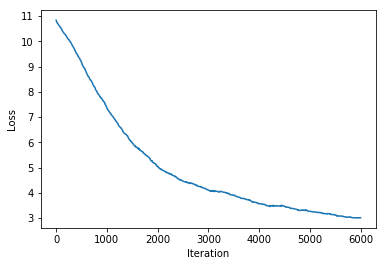

In [8]:
n_user = 943  #用户数
n_item = 1682  #电影数
K = 2  #矩阵分解的系数

lr = 0.1  #学习率

#导入训练集和测试集
R_train = loadData('./ml-100k/u1.base')
R_test = loadData('./ml-100k/u1.test')

iteration = 6000  #训练次数

np.random.seed(1)
data_list = dataScale(R_train)  #扫描并记录训练集矩阵中的非零项
random_list = np.random.randint(0, len(data_list),iteration)  #生成随机数列表


P = np.random.rand(n_user,K)  #随机初始化P、Q矩阵
Q = np.random.rand(n_item,K  #为方便计算，我把Q的格式设置为: n_item * k

loss = [] #记录测试集的loss值

SGD(R_train,R_test,P,Q,loss,lr,iteration,random_list,data_list)  #对传进SGD进行训练

plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
n_user = 943  #用户数
n_item = 1682  #电影数
K = 2  #矩阵分解的系数

lr = 0.1  #学习率

#导入训练集和测试集
R_train = loadData('./ml-100k/u1.base')
R_test = loadData('./ml-100k/u1.test')

iteration = 8000  #训练次数

np.random.seed(1)
data_list = dataScale(R_train)  #扫描并记录训练集矩阵中的非零项
random_list = np.random.randint(0, len(data_list),iteration)  #生成随机数列表


P = np.random.rand(n_user,K)  #随机初始化P、Q矩阵
Q = np.random.rand(n_item,K)  #为方便计算，我把Q的格式设置为: n_item * k

loss = [] #记录测试集的loss值

SGD(R_train,R_test,P,Q,loss,lr,iteration,random_list,data_list)  #对传进SGD进行训练

plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()